# Project 1 (M6): Regression for Numeric Data
# DAV 6150

- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/Zhengnan817/DAV-6150/tree/1f6efa951f5b5984564fb500ce7e1d4271e0e147/Project_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction
This project is to analyze the dataset comprised of information pertaining to NY State High School graduation metrics for the 2018-2019 school year. Our goal is to develop one or more regression models to predict the number of dropouts in a school district or for a specific group of students. This prediction will be based on a variety of characteristics related to district characteristics, student groupings, and possibly other relevant factors such as socioeconomic status of students, geographic location of the district, school resources and capacity, etc. 

In short, we will apply the full data science project lifecycle to the implementation and evaluation of a series of regression models that predict the number of student “dropouts” relative to certain properties/characteristics of a given school district and associated student subgrouping. 

### 1.1 Approach:
- [Introduction](#1-introduction): Import the data set and introduce data variables.  
- [EDA](#2-eda): Explore the raw dataset and do analysis based on domain knowledge.  
- [Data Preparation](#3-Data-Preparation): Perform data cleaning, imputation and transformation.  
- [Prepped Data Overview](#4-Prepped-Data-Overview): Re-run the EDA to ensure the data is well prepared for subsequent modeling.  
- [Regression Modeling](#5-Regression-Modeling): Perform two Poisson, two different negative binomial, two multiple linear regression models and analyse the metrics of the model.  
- [Select Models](#6-Select-Models): Explain how we selected the model selection criteria.  
- [Conclusion](#7-Conclusion)

### 1.2 Data Introduction


The dataset is comprised of more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. A data dictionary describing the attributes contained within the file is provided below.  
The dataset is sourced from the NY 
State Education Department (NYSED): https://data.nysed.gov/downloads.php

| Variable Name               | Description                                                                                         |
|-----------------------------|-----------------------------------------------------------------------------------------------------|
| report_school_year          | Indicates school year for which high school graduation info is being reported                         |
| aggregation_index           | Numeric code identifying manner in which high school graduation data has been aggregated              |
| aggregation_type            | Text description of how high school graduation data has been aggregated                               |
| nrc_code                    | Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district |
| nrc_desc                    | Text description of the type of school district                                                       |
| county_code                 | Numeric code for county name                                                                         |
| county_name                 | Full name of applicable NY State county                                                              |
| nyc_ind                     | Indicates whether or not the school district resides within the borders of NYC                        |
| membership_desc             | Indicates school year in which students first enrolled in High School                                 |
| subgroup_code               | Numeric code identifying student subgrouping                                                         |
| subgroup_name               | Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) |
| enroll_cnt                  | How many students of the indicated subgrouping were enrolled during the given school year            |
| grad_cnt                    | How many enrolled students of the indicated subgrouping graduated at the end of the given school year |
| grad_pct                    | What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year |
| local_cnt                   | How many enrolled students of the indicated subgrouping were awarded a "Local" diploma               |
| local_pct                   | What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma     |
| reg_cnt                     | How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma             |
| reg_pct                     | What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma   |
| reg_adv_cnt                 | How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma    |
| reg_adv_pct                 | What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma |
| non_diploma_credential_cnt  | How many enrolled students of the indicated subgrouping achieved a non-diploma credential             |
| non_diploma_credential_pct  | What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential   |
| still_enrolled_cnt          | How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled     |
| still_enrolled_pct          | What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled |
| ged_cnt                     | How many enrolled students of the indicated subgrouping were awarded a "GED" diploma                  |
| ged_pct                     | What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma      |
| dropout_cnt                 | How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year |
| dropout_pct                 | What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year |

Read the data from our github repository. The dataframe is shown below.

In [2]:
school_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/M6/Project1_Data.csv")
school_raw.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [3]:
school_raw.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

# 2. Exploratory Data Analysis
In this part, we will explore the raw dataset and analyze the missing and invalid values, make histograms and other graphs to determine how to clean the data to improve its usability.  
First start with the matrix of the dataframe. The dataframe has 73152 rows of observations and 29 attributes. We will dive deeper into the dataframe by looking at different columns.

# 3. Data Preparation

# 3.1 Data Transformation
First we need to deal with the subgroups within the dataset.  
In this dataset all the missing value are marked as "-" and we need to turn them into NaN.  
And alter the percentage data from string to float.

In [4]:
school_raw.replace("-", np.nan, inplace=True)
school_raw['grad_pct'] = school_raw['grad_pct'].str.strip('%').astype(float)/100 
school_raw['local_pct'] = school_raw['local_pct'].str.strip('%').astype(float)/100 
school_raw['reg_pct'] = school_raw['reg_pct'].str.strip('%').astype(float)/100 
school_raw['reg_adv_pct'] = school_raw['reg_adv_pct'].str.strip('%').astype(float)/100 
school_raw['non_diploma_credential_pct'] = school_raw['non_diploma_credential_pct'].str.strip('%').astype(float)/100 
school_raw['still_enr_cnt'] = school_raw['still_enr_cnt'].str.strip('%').astype(float)/100
school_raw['ged_pct'] = school_raw['ged_pct'].str.strip('%').astype(float)/100
school_raw['dropout_pct'] = school_raw['dropout_pct'].str.strip('%').astype(float)/100
school_raw['still_enr_pct'] = school_raw['still_enr_pct'].str.strip('%').astype(float)/100

Now we will melt the subgroups in variale. From the subgroups valuecounts below, we can see that there are 24 subgroups. Since we are pridicting the dropout count and we need each observation to be weighted evenly, we can only use the subgroup "All Students" for observation. To make full use of the data, we will take the percentage of each subgroup and melt them into new variables.

The valuecounts suggests that there are 4074 sets of subgroups and many subgroups are missing. We will select the subgroups that has over 4000 sets to make sure the percentage data is convincing.

In [5]:
school_raw["subgroup_name"].value_counts()

subgroup_name
All Students                         4074
Parent Not in Armed Forces           4074
Not Homeless                         4074
Not Migrant                          4074
Not in Foster Care                   4070
Not English Language Learner         4068
Male                                 4068
Female                               4060
General Education Students           4056
White                                4050
Economically Disadvantaged           4046
Students with Disabilities           4028
Not Economically Disadvantaged       4028
Hispanic                             3352
Black                                3066
Asian/Pacific Islander               2752
Homeless                             2702
Multiracial                          2690
English Language Learner             1824
Formerly English Language Learner    1464
American Indian/Alaska Native        1312
In Foster Care                        616
Migrant                               362
Parent in Armed Forc

We filter out other subgroups and keep the subgroup of all students, and calculate the percentage for each school under different years. 
So we have __Parent Not in Armed Forces , Not Homeless , Not Migrant ,Not in Foster Care ,Not English Language Learner , Male ,General Education Students, White ,Economically Disadvantaged ,Students with Disabilities__ as our new variables.

In [6]:
#这段像屎一样要运行很久
df_reshaped=school_raw[school_raw['subgroup_name']=='All Students']
df_reshaped=df_reshaped.dropna()
grouped_membership= school_raw.groupby('membership_desc')
for membership_name, membership in grouped_membership:
    grouped_school= membership.groupby('aggregation_name')
    for school_name, school in grouped_school:
        
        all_student = school[school['subgroup_name']=="All Students"]['enroll_cnt'].iloc[0]
        if pd.isna(all_student):
            continue
        all_student = int(all_student)


        for subgroup in ["Male", "Parent Not in Armed Forces", "Not Homeless", "Not Migrant", "Not in Foster Care", "Not English Language Learner", "General Education Students", "White", "Economically Disadvantaged", "Students with Disabilities"]:
            subgroup_row = school[school['subgroup_name'] == subgroup]
            if not subgroup_row.empty:
                subgroup_enroll = subgroup_row['enroll_cnt'].iloc[0]
            else:
                subgroup_enroll = np.nan
            
            if not pd.isna(subgroup_enroll) and all_student != 0:
                subgroup_pct = int(subgroup_enroll) / all_student
            else:
                subgroup_pct = np.nan
            
            mask_membership = df_reshaped['membership_desc'] == membership_name
            mask_aggregation = df_reshaped['aggregation_name'] == school_name

            # Apply conditions and assign value to respective subgroup column
            df_reshaped.loc[mask_membership & mask_aggregation, f'{subgroup}_pct'] = subgroup_pct
df_reshaped[["Male_pct", "Parent Not in Armed Forces_pct", "Not Homeless_pct", "Not Migrant_pct", "Not in Foster Care_pct", "Not English Language Learner_pct", "General Education Students_pct", "White_pct", "Economically Disadvantaged_pct", "Students with Disabilities_pct"]]

,Male_pct,Parent Not in Armed Forces_pct,Not Homeless_pct,Not Migrant_pct,Not in Foster Care_pct,Not English Language Learner_pct,General Education Students_pct,White_pct,Economically Disadvantaged_pct,Students with Disabilities_pct
0,0.507599,NaN,0.971125,NaN,NaN,0.931611,0.826748,0.197568,0.495441,0.173252
22,0.505900,NaN,0.969027,NaN,NaN,0.941003,0.831858,0.203540,0.501475,0.168142
44,0.514205,NaN,0.964489,NaN,NaN,0.901989,0.862216,0.201705,0.582386,0.137784
66,0.505900,NaN,0.969027,NaN,NaN,0.941003,0.831858,0.203540,0.501475,0.168142
88,0.514205,NaN,0.964489,NaN,NaN,0.901989,0.862216,0.201705,0.582386,0.137784
...,...,...,...,...,...,...,...,...,...,...
73074,0.591837,NaN,NaN,NaN,NaN,NaN,0.775510,NaN,0.653061,0.224490
73090,0.627119,NaN,NaN,NaN,NaN,NaN,0.813559,NaN,0.440678,0.186441
73105,0.591837,NaN,NaN,NaN,NaN,NaN,0.775510,NaN,0.653061,0.224490
73121,0.627119,NaN,NaN,NaN,NaN,NaN,0.813559,NaN,0.440678,0.186441


However there are too many null values due to exsisted null values under certain subgroups. We will only take __Male_pct,Economically Disadvantaged_pct,General Education Students_pct and Students with Disabilities_pct__ as new variables.

In [7]:
display(df_reshaped[["Male_pct", "Parent Not in Armed Forces_pct", "Not Homeless_pct", "Not Migrant_pct", "Not in Foster Care_pct", "Not English Language Learner_pct", "General Education Students_pct", "White_pct", "Economically Disadvantaged_pct", "Students with Disabilities_pct"]].isnull().sum().sort_values())
excluded_columns = ["Parent Not in Armed Forces_pct", "Not Homeless_pct", "Not Migrant_pct", "Not in Foster Care_pct", "Not English Language Learner_pct","White_pct" ]

# Keep all columns except the excluded ones
df_reshaped = df_reshaped.drop(columns=excluded_columns)

df_reshaped

Male_pct                              76
Economically Disadvantaged_pct       128
General Education Students_pct       414
Students with Disabilities_pct       414
White_pct                           1256
Not Homeless_pct                    3084
Not English Language Learner_pct    3174
Not in Foster Care_pct              4010
Parent Not in Armed Forces_pct      4018
Not Migrant_pct                     4028
dtype: int64

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,Male_pct,General Education Students_pct,Economically Disadvantaged_pct,Students with Disabilities_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0.30,0.05,0,0.00,148,0.22,0.507599,0.826748,0.495441,0.173252
22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014 Total Cohort - 5 Year Outcome,...,0.43,0.06,7,0.01,140,0.21,0.505900,0.831858,0.501475,0.168142
44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015 Total Cohort - 4 Year Outcome,...,1.23,0.17,7,0.01,115,0.16,0.514205,0.862216,0.582386,0.137784
66,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,0.35,0.05,7,0.01,140,0.21,0.505900,0.831858,0.501475,0.168142
88,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,0.99,0.14,7,0.01,115,0.16,0.514205,0.862216,0.582386,0.137784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014 Total Cohort - 5 Year Outcome,...,0.01,0.02,0,0.00,4,0.08,0.591837,0.775510,0.653061,0.224490
73090,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015 Total Cohort - 4 Year Outcome,...,0.05,0.08,0,0.00,4,0.07,0.627119,0.813559,0.440678,0.186441
73105,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,0.00,0.00,0,0.00,4,0.08,0.591837,0.775510,0.653061,0.224490
73121,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,0.05,0.08,0,0.00,4,0.07,0.627119,0.813559,0.440678,0.186441


The dataset has variables that are duplicated. In variable "membership_desc", the rows for "2013 Total Cohort - 6 Year Outcom" and "2013 Total Cohort - 6 Year Outcome - August 201" are the same.

In [8]:
conditions_to_drop = (df_reshaped['membership_desc'] == '2014 Total Cohort - 5 Year Outcome - August 2019') | \
                     (df_reshaped['membership_desc'] == '2015 Total Cohort - 4 Year Outcome - August 2019') | \
                     (df_reshaped['membership_desc'] == '2013 Total Cohort - 6 Year Outcome - August 2019')

# Drop rows based on conditions
df_reshaped = df_reshaped[~conditions_to_drop]
# Replace values in the membership_desc column
df_reshaped['membership_desc'] = df_reshaped['membership_desc'].replace({
    '2014 Total Cohort - 5 Year Outcome': 2014,
    '2015 Total Cohort - 4 Year Outcome': 2015,
    '2013 Total Cohort - 6 Year Outcome': 2013
})


C:\Users\86136\AppData\Local\Temp\ipykernel_61392\1860550354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reshaped['membership_desc'] = df_reshaped['membership_desc'].replace({


In [9]:
df_reshaped

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,Male_pct,General Education Students_pct,Economically Disadvantaged_pct,Students with Disabilities_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013,...,0.30,0.05,0,0.00,148,0.22,0.507599,0.826748,0.495441,0.173252
22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014,...,0.43,0.06,7,0.01,140,0.21,0.505900,0.831858,0.501475,0.168142
44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015,...,1.23,0.17,7,0.01,115,0.16,0.514205,0.862216,0.582386,0.137784
132,2018-19,3,District,BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT,5,Average Needs,1,ALBANY,0,2013,...,0.02,0.03,0,0.00,3,0.05,0.603175,0.825397,0.317460,0.174603
147,2018-19,3,District,BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT,5,Average Needs,1,ALBANY,0,2014,...,0.00,0.00,0,0.00,1,0.01,0.552632,0.921053,0.368421,0.078947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72960,2018-19,3,District,PENN YAN CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014,...,0.00,0.00,0,0.00,19,0.15,0.556452,0.879032,0.572581,0.120968
72980,2018-19,3,District,PENN YAN CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015,...,0.11,0.09,0,0.00,8,0.07,0.525424,0.872881,0.559322,0.127119
73058,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013,...,0.02,0.03,0,0.00,11,0.18,0.590164,0.786885,0.540984,0.213115
73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014,...,0.01,0.02,0,0.00,4,0.08,0.591837,0.775510,0.653061,0.224490


In [10]:
df_reshaped.isnull().sum().sort_values()

report_school_year                  0
dropout_pct                         0
dropout_cnt                         0
ged_pct                             0
ged_cnt                             0
still_enr_pct                       0
still_enr_cnt                       0
non_diploma_credential_pct          0
non_diploma_credential_cnt          0
reg_adv_pct                         0
reg_adv_cnt                         0
reg_pct                             0
reg_cnt                             0
local_cnt                           0
local_pct                           0
grad_cnt                            0
aggregation_index                   0
aggregation_type                    0
aggregation_name                    0
nrc_code                            0
nrc_desc                            0
grad_pct                            0
county_code                         0
nyc_ind                             0
membership_desc                     0
subgroup_code                       0
subgroup_nam

In [11]:

# Columns to impute nulls
columns_to_impute = ['Male_pct', 'Economically Disadvantaged_pct', 'General Education Students_pct', 'Students with Disabilities_pct']

# Impute nulls with the desired values
for column in columns_to_impute:
    df_reshaped[column].fillna(df_reshaped[column].median(), inplace=True)


C:\Users\86136\AppData\Local\Temp\ipykernel_61392\3744965120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reshaped[column].fillna(df_reshaped[column].median(), inplace=True)


report_school_year                0
General Education Students_pct    0
Male_pct                          0
dropout_pct                       0
dropout_cnt                       0
ged_pct                           0
ged_cnt                           0
still_enr_pct                     0
still_enr_cnt                     0
non_diploma_credential_pct        0
non_diploma_credential_cnt        0
reg_adv_pct                       0
reg_adv_cnt                       0
reg_pct                           0
reg_cnt                           0
Economically Disadvantaged_pct    0
local_pct                         0
grad_pct                          0
grad_cnt                          0
enroll_cnt                        0
subgroup_name                     0
subgroup_code                     0
membership_desc                   0
nyc_ind                           0
county_name                       0
county_code                       0
nrc_desc                          0
nrc_code                    

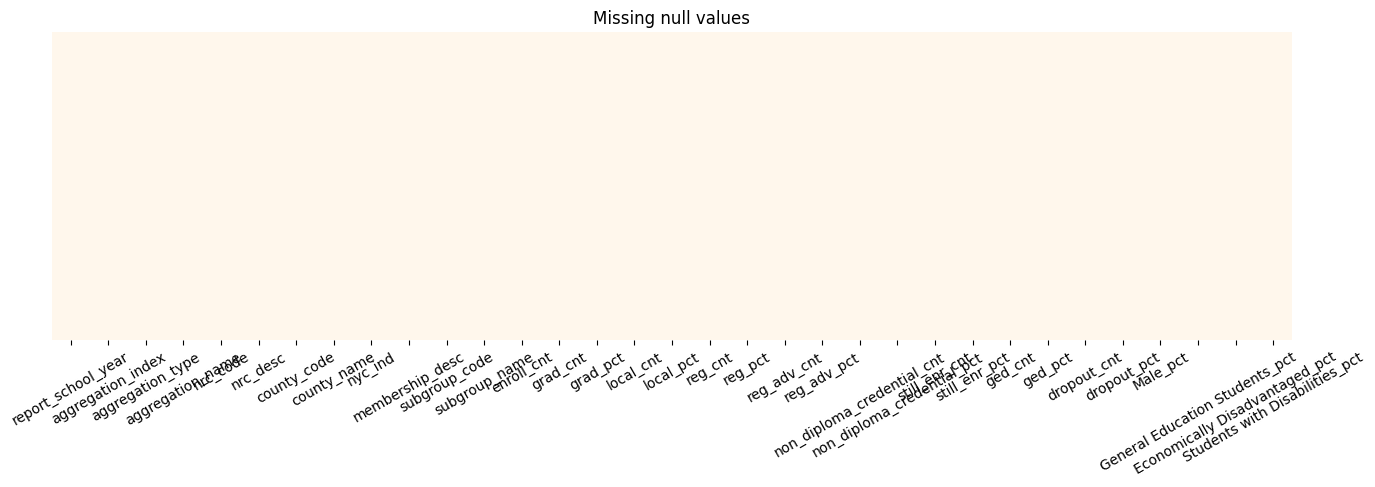

In [12]:
plt.rcParams["figure.figsize"] = (16, 4)
sns.heatmap(df_reshaped.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing null values")
plt.xticks(rotation=30)
df_reshaped.isnull().sum().sort_values()

# 4. Prepped Data Overview

# 5. Regression Modeling

# 6. Select Models

# 7. Conclusion